# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')
#project_data=project_data.sample(n=1000,random_state=0)
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna(' ')

In [3]:
y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

Number of projects thar are approved for funding  92706 , ( 84.85830404217927 %)
Number of projects thar are not approved for funding  16542 , ( 15.141695957820739 %)


In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


### Sort Data from oldest to Newest.

In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   

                                      project_title  \
0  Educational Support for English Learners at Home   
1             Wanted: Projector for Hungry Learners   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  
0  My students are English learners that are work...  
1  Our students arrive to our school eager to lea...

In [10]:
# printing some random reviews
print(project_data['essay'].values[0])


My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
sent = decontracted(project_data['essay'].values[1])
print(sent)
print("="*50)

Our students arrive to our school eager to learn. They are polite, generous, and strive to be the best they can be. They know that with an education, they can succeed in life and help improve on the lives that they have now.\r\n\r\nOur school focuses on families with low incomes and tries to give each student the education they deserve. While we do not have much, the students use the materials they are given and do the very best they can with them.The projector we need for our school is very crucial for the academic improvement of our students. As technology continues to grow, there are so many resources in the internet that we as teachers use to further the growth of our students. However, our school is very limited with resources - particularly, technology - and without it, we are at a disadvantage. One of the things that could really help our classrooms is a projector.\r\n\r\n\r\nWith a projector, not only is it crucial with instruction, but also for the growth of our students. With

In [13]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Our students arrive to our school eager to learn. They are polite, generous, and strive to be the best they can be. They know that with an education, they can succeed in life and help improve on the lives that they have now.    Our school focuses on families with low incomes and tries to give each student the education they deserve. While we do not have much, the students use the materials they are given and do the very best they can with them.The projector we need for our school is very crucial for the academic improvement of our students. As technology continues to grow, there are so many resources in the internet that we as teachers use to further the growth of our students. However, our school is very limited with resources - particularly, technology - and without it, we are at a disadvantage. One of the things that could really help our classrooms is a projector.      With a projector, not only is it crucial with instruction, but also for the growth of our students. With a project

In [14]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Our students arrive to our school eager to learn They are polite generous and strive to be the best they can be They know that with an education they can succeed in life and help improve on the lives that they have now Our school focuses on families with low incomes and tries to give each student the education they deserve While we do not have much the students use the materials they are given and do the very best they can with them The projector we need for our school is very crucial for the academic improvement of our students As technology continues to grow there are so many resources in the internet that we as teachers use to further the growth of our students However our school is very limited with resources particularly technology and without it we are at a disadvantage One of the things that could really help our classrooms is a projector With a projector not only is it crucial with instruction but also for the growth of our students With a projector we can show presentations do

In [15]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [16]:
# Combining all the above stundents 
def Text_cleaner(data):
    from tqdm import tqdm
    preprocessed_essays = []
    # tqdm is for printing the status bar
    for sentance in tqdm(data.values):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_essays.append(sent.lower().strip())
    return preprocessed_essays

In [17]:
# after preprocesing
preprocessed_essays=Text_cleaner(project_data['essay'])

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:59<00:00, 1836.01it/s]


In [18]:
preprocessed_essays[1]

'students arrive school eager learn polite generous strive best know education succeed life help improve lives school focuses families low incomes tries give student education deserve not much students use materials given best projector need school crucial academic improvement students technology continues grow many resources internet teachers use growth students however school limited resources particularly technology without disadvantage one things could really help classrooms projector projector not crucial instruction also growth students projector show presentations documentaries photos historical land sites math problems much projector make teaching learning easier also targeting different types learners classrooms auditory visual kinesthetic etc nannan'

In [19]:
project_data['essay'] = preprocessed_essays
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   
3          45  p246581  f3cb9bffbba169bef1a77b243e620b60           Mrs.   
4      172407  p104768  be1f7507a41f8479dc06f047086a39ec           Mrs.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   
3           KY        2016-10-06 21:16:17          Grades PreK-2   
4           TX        2016-07-11 01:10:09          Grades PreK-2   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   
3                             Techie Kindergarteners   
4                             Interactive Math Tools   

                            project_resource_summary  \
0  My students need opportunities to practice beg...   
1  My students need a projector to help with view...   
2  My students need shine guards, athletic socks,...   
3  My students need to engage in Reading and Math...   
4  My students need hands on practice in mathemat...   

   teacher_number_of_previously_posted_projects  project_is_approved  \
0                                             0                    0   
1                                             7                    1   
2                                             1                    0   
3                                             4                    1   
4                                             1                    1   

                 clean_categories           clean_subcategories  \
0               Literacy_Language                  ESL Literacy   
1    History_Civics Health_Sports  Civics_Government TeamSports   
2                   Health_Sports    Health_Wellness TeamSports   
3  Literacy_Language Math_Science          Literacy Mathematics   
4                    Math_Science                   Mathematics   

                                               essay  
0  students english learners working english seco...  
1  students arrive school eager learn polite gene...  
2  true champions not always ones win guts mia ha...  
3  work unique school filled esl english second l...  
4  second grade classroom next year made around 2...

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [20]:
# similarly you can preprocess the titles also
preprocessed_project_title=Text_cleaner(project_data['project_title'])

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:02<00:00, 42221.67it/s]


In [21]:
preprocessed_project_title[1]

'wanted projector hungry learners'

In [22]:
project_data['Cleaned_title']=preprocessed_project_title
project_data.drop(['project_title'], axis=1, inplace=True)

## 1.5 Preparing data for models

In [23]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [24]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'Cleaned_title',
       'price', 'quantity'],
      dtype='object')

In [25]:
project_data.drop(['project_resource_summary'], axis=1, inplace=True)
project_data.drop(['Unnamed: 0'], axis=1, inplace=True)
project_data.drop(['id'], axis=1, inplace=True)
project_data.drop(['teacher_id'], axis=1, inplace=True)



### adding the count of letter in each essay as a new data coloumn

In [26]:
project_data['essay_count']=project_data['essay'].str.len()
project_data['title_count']=project_data['Cleaned_title'].str.len()

### Adding a new coloumn
    -- this will be used for set 5
    -- use VADER SENTIMENT for sentiment scoring the essaay
    

In [27]:
#https://medium.com/analytics-vidhya/simplifying-social-media-sentiment-analysis-using-vader-in-python-f9e6ec6fc52f
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
sentiment_score=[]
for essay in tqdm(project_data['essay']):
        score = analyser.polarity_scores(essay)['pos']
        sentiment_score.append(score)


100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [08:15<00:00, 220.68it/s]


In [28]:
project_data['essay_sentiment_score']=sentiment_score

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical
       
       -Length of words in essay
       -Length of words in title
       
       -Sentiment score of the essay (SET 5)

### Declare the Dependant and independant variables 

In [29]:
#https://stackoverflow.com/questions/29763620/how-to-select-all-columns-except-one-column-in-pandas
X=project_data.loc[:, project_data.columns != 'project_is_approved']
y=project_data['project_is_approved']
X.shape

(109248, 14)

## Splitting data into Test,Train,CV

In [30]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

from sklearn.model_selection import train_test_split

X_train,X_test,y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=0,stratify=y)
X_train,X_cv,y_train,y_cv=train_test_split(X_train, y_train, test_size=0.3, random_state=0,stratify=y_train)


print(X_train.shape)
print(X_test.shape)
print(X_cv.shape)
print(y_train.shape)
print(y_test.shape)
print(y_cv.shape)





(53531, 14)
(32775, 14)
(22942, 14)
(53531,)
(32775,)
(22942,)


In [31]:
X.head(2)

teacher_prefix school_state project_submitted_datetime  \
0           Mrs.           IN        2016-12-05 13:43:57   
1            Mr.           FL        2016-10-25 09:22:10   

  project_grade_category  teacher_number_of_previously_posted_projects  \
0          Grades PreK-2                                             0   
1             Grades 6-8                                             7   

               clean_categories           clean_subcategories  \
0             Literacy_Language                  ESL Literacy   
1  History_Civics Health_Sports  Civics_Government TeamSports   

                                               essay  \
0  students english learners working english seco...   
1  students arrive school eager learn polite gene...   

                               Cleaned_title  price  quantity  essay_count  \
0  educational support english learners home  154.6        23         1075   
1           wanted projector hungry learners  299.0         1          768   

   title_count  essay_sentiment_score  
0           41                  0.154  
1           32                  0.305

### Vectorize the Features

In [32]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_categories=vectorizer.transform(X_train['clean_categories'].values)
X_test_clean_categories=vectorizer.transform(X_test['clean_categories'].values)
X_cv_clean_categories=vectorizer.transform(X_cv['clean_categories'].values)


print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",X_train_clean_categories.shape)

['AppliedLearning', 'Care_Hunger', 'Health_Sports', 'History_Civics', 'Literacy_Language', 'Math_Science', 'Music_Arts', 'SpecialNeeds', 'Warmth']
Shape of matrix after one hot encodig  (53531, 9)


In [33]:
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_sub_categories=vectorizer.transform(X_train['clean_subcategories'].values)
X_test_clean_sub_categories=vectorizer.transform(X_test['clean_subcategories'].values)
X_cv_clean_sub_categories=vectorizer.transform(X_cv['clean_subcategories'].values)


print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",X_train_clean_sub_categories.shape)

['AppliedSciences', 'Care_Hunger', 'CharacterEducation', 'Civics_Government', 'College_CareerPrep', 'CommunityService', 'ESL', 'EarlyDevelopment', 'Economics', 'EnvironmentalScience', 'Extracurricular', 'FinancialLiteracy', 'ForeignLanguages', 'Gym_Fitness', 'Health_LifeScience', 'Health_Wellness', 'History_Geography', 'Literacy', 'Literature_Writing', 'Mathematics', 'Music', 'NutritionEducation', 'Other', 'ParentInvolvement', 'PerformingArts', 'SocialSciences', 'SpecialNeeds', 'TeamSports', 'VisualArts', 'Warmth']
Shape of matrix after one hot encodig  (53531, 30)


In [34]:
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(X_train['school_state'].values)

# we use the fitted CountVectorizer to convert the text to vector
X_train_skl_state=vectorizer.transform(X_train['school_state'].values)
X_test_skl_state=vectorizer.transform(X_test['school_state'].values)
X_cv_skl_state=vectorizer.transform(X_cv['school_state'].values)


print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",X_train_skl_state.shape)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
Shape of matrix after one hot encodig  (53531, 51)


In [35]:
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(X_train['teacher_prefix'].values)

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_prefix=vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_prefix=vectorizer.transform(X_test['teacher_prefix'].values)
X_cv_teacher_prefix=vectorizer.transform(X_cv['teacher_prefix'].values)


print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",X_train_teacher_prefix.shape)


['Dr', 'Mr', 'Mrs', 'Ms', 'Teacher']
Shape of matrix after one hot encodig  (53531, 5)


In [36]:
vectorizer = CountVectorizer(lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values)

# we use the fitted CountVectorizer to convert the text to vector
X_train_project_grade_category=vectorizer.transform(X_train['project_grade_category'].values)
X_test_project_grade_category=vectorizer.transform(X_test['project_grade_category'].values)
X_cv_project_grade_category=vectorizer.transform(X_cv['project_grade_category'].values)


print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",X_train_project_grade_category.shape)


['12', 'Grades', 'PreK']
Shape of matrix after one hot encodig  (53531, 3)


In [37]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
X_train_price_standardized = price_scalar.transform(X_train['price'].values.reshape(-1, 1))
X_test_price_standardized = price_scalar.transform(X_test['price'].values.reshape(-1, 1))
X_cv_price_standardized = price_scalar.transform(X_cv['price'].values.reshape(-1, 1))

Mean : 298.26843193663484, Standard deviation : 359.19314401286744


In [38]:
quantity_scalar = StandardScaler()
quantity_scalar.fit(X_train['quantity'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {quantity_scalar.mean_[0]}, Standard deviation : {np.sqrt(quantity_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
X_train_quantity_standardized = quantity_scalar.transform(X_train['quantity'].values.reshape(-1, 1))
X_test_quantity_standardized = quantity_scalar.transform(X_test['quantity'].values.reshape(-1, 1))
X_cv_quantity_standardized = quantity_scalar.transform(X_cv['quantity'].values.reshape(-1, 1))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



Mean : 17.074872503782856, Standard deviation : 26.471598181519965


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [39]:
count_scalar = StandardScaler()
count_scalar.fit(X_train['essay_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {count_scalar.mean_[0]}, Standard deviation : {np.sqrt(count_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
X_train_essay_count_standardized = count_scalar.transform(X_train['essay_count'].values.reshape(-1, 1))
X_test_essay_count_standardized = count_scalar.transform(X_test['essay_count'].values.reshape(-1, 1))
X_cv_essay_count_standardized = count_scalar.transform(X_cv['essay_count'].values.reshape(-1, 1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



Mean : 1013.8440903401768, Standard deviation : 276.31939267720185


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [40]:
count_scalar = StandardScaler()
count_scalar.fit(X_train['title_count'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {count_scalar.mean_[0]}, Standard deviation : {np.sqrt(count_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
X_train_title_count_standardized = count_scalar.transform(X_train['title_count'].values.reshape(-1, 1))
X_test_title_count_standardized = count_scalar.transform(X_test['title_count'].values.reshape(-1, 1))
X_cv_title_count_standardized = count_scalar.transform(X_cv['title_count'].values.reshape(-1, 1))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



Mean : 25.744708673478918, Standard deviation : 11.75039864967846


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [41]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'])

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow=vectorizer.transform(X_train['essay'].values)
X_test_essay_bow=vectorizer.transform(X_test['essay'].values)
X_cv_essay_bow=vectorizer.transform(X_cv['essay'].values)


print("Shape of matrix after one hot encodig ",X_train_essay_bow.shape)

Shape of matrix after one hot encodig  (53531, 5000)


In [42]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vectorizer = CountVectorizer(min_df=5)
vectorizer.fit(X_train['Cleaned_title'])

# we use the fitted CountVectorizer to convert the text to vector
X_train_cleaned_title_bow=vectorizer.transform(X_train['Cleaned_title'].values)
X_test_cleaned_title_bow=vectorizer.transform(X_test['Cleaned_title'].values)
X_cv_cleaned_title_bow=vectorizer.transform(X_cv['Cleaned_title'].values)


print("Shape of matrix after one hot encodig ",X_train_cleaned_title_bow.shape)



Shape of matrix after one hot encodig  (53531, 3346)


#### 1.5.2.2 TFIDF vectorizer

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'])

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf=vectorizer.transform(X_train['essay'].values)
X_test_essay_tfidf=vectorizer.transform(X_test['essay'].values)
X_cv_essay_tfidf=vectorizer.transform(X_cv['essay'].values)


print("Shape of matrix after one hot encodig ",X_train_essay_tfidf.shape)


Shape of matrix after one hot encodig  (53531, 5000)


In [44]:
# Similarly you can vectorize for title alsovectorizer = TfidfVectorizer(min_df=10)
vectorizer = TfidfVectorizer(min_df=5)

# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it
vectorizer.fit(X_train['Cleaned_title'])

# we use the fitted CountVectorizer to convert the text to vector
X_train_cleaned_title_tfidf=vectorizer.transform(X_train['Cleaned_title'].values)
X_test_cleaned_title_tfidf=vectorizer.transform(X_test['Cleaned_title'].values)
X_cv_cleaned_title_tfidf=vectorizer.transform(X_cv['Cleaned_title'].values)


print("Shape of matrix after one hot encodig ",X_train_cleaned_title_tfidf.shape)



Shape of matrix after one hot encodig  (53531, 3346)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [45]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [46]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [47]:
# average Word2Vec
# compute average word2vec for each review.
def avg_w2v_vectors(preprocessed_essays):
    avg_w2v_vectors_text = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_essays): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors_text.append(vector)
    return avg_w2v_vectors_text

X_train_essay_w2v=avg_w2v_vectors(X_train['essay'])
X_test_essay_w2v=avg_w2v_vectors(X_test['essay'])
X_cv_essay_w2v=avg_w2v_vectors(X_cv['essay'])

X_train_cleaned_title_w2v=avg_w2v_vectors(X_train['Cleaned_title'])
X_test_cleaned_title_w2v=avg_w2v_vectors(X_test['Cleaned_title'])
X_cv_cleaned_title_w2v=avg_w2v_vectors(X_cv['Cleaned_title'])



100%|█████████████████████████████████████████████████████████████████████████| 22942/22942 [00:00<00:00, 71395.77it/s]


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [48]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['essay'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_essay = set(tfidf_model.get_feature_names())
print(len(tfidf_words_essay))



42499


In [49]:
# average Word2Vec
# compute average word2vec for each review.
def tfidf_w2v_vectors(tfidf_words,preprocessed_essays):
    tfidf_w2v_vectors_text = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(preprocessed_essays): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors_text.append(vector)
    return tfidf_w2v_vectors_text

X_train_essay_tfidf_w2v=tfidf_w2v_vectors(tfidf_words_essay,X_train['essay'])
X_test_essay_tfidf_w2v=tfidf_w2v_vectors(tfidf_words_essay,X_test['essay'])
X_cv_essay_tfidf_w2v=tfidf_w2v_vectors(tfidf_words_essay,X_cv['essay'])



100%|███████████████████████████████████████████████████████████████████████████| 22942/22942 [00:42<00:00, 542.98it/s]


In [50]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['Cleaned_title'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_Cleaned_title = set(tfidf_model.get_feature_names())
print(len(tfidf_words_Cleaned_title))


12119


In [51]:
X_train_cleaned_title_tfidf_w2v=tfidf_w2v_vectors(tfidf_words_Cleaned_title,X_train['Cleaned_title'])
X_test_cleaned_title_tfidf_w2v=tfidf_w2v_vectors(tfidf_words_Cleaned_title,X_test['Cleaned_title'])
X_cv_cleaned_title_tfidf_w2v=tfidf_w2v_vectors(tfidf_words_Cleaned_title,X_cv['Cleaned_title'])


100%|█████████████████████████████████████████████████████████████████████████| 22942/22942 [00:00<00:00, 27349.60it/s]


In [52]:

X_train_prev_proj=X_train['teacher_number_of_previously_posted_projects'][:,np.newaxis]

X_test_prev_proj=X_test['teacher_number_of_previously_posted_projects'][:,np.newaxis]
X_cv_prev_proj=X_cv['teacher_number_of_previously_posted_projects'][:,np.newaxis]



### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [58]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack


# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train_bow = hstack((X_train_clean_categories, X_train_clean_sub_categories,X_train_skl_state,X_train_teacher_prefix,
            X_train_project_grade_category,X_train_price_standardized,X_train_quantity_standardized,X_train_prev_proj,
            X_train_essay_bow,X_train_cleaned_title_bow,X_train_essay_count_standardized,X_train_title_count_standardized
            )).toarray()


X_test_bow = hstack((X_test_clean_categories, X_test_clean_sub_categories,X_test_skl_state,X_test_teacher_prefix,
            X_test_project_grade_category,X_test_price_standardized,X_test_quantity_standardized,X_test_prev_proj,
            X_test_essay_bow,X_test_cleaned_title_bow,X_test_essay_count_standardized,X_test_title_count_standardized
            )).toarray()


X_cv_bow = hstack((X_cv_clean_categories, X_cv_clean_sub_categories,X_cv_skl_state,X_cv_teacher_prefix,
            X_cv_project_grade_category,X_cv_price_standardized,X_cv_quantity_standardized,X_cv_prev_proj,
            X_cv_essay_bow,X_cv_cleaned_title_bow,X_cv_essay_count_standardized,X_cv_title_count_standardized
            )).toarray()


print(X_train_bow.shape)
print(X_test_bow.shape)
print(X_cv_bow.shape)


(53531, 8449)
(32775, 8449)
(22942, 8449)


In [59]:

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train_tfidf = hstack((X_train_clean_categories, X_train_clean_sub_categories,X_train_skl_state,X_train_teacher_prefix,
            X_train_project_grade_category,X_train_price_standardized,X_train_quantity_standardized,X_train_prev_proj,
            X_train_essay_tfidf,X_train_cleaned_title_tfidf,X_train_essay_count_standardized,X_train_title_count_standardized
            )).toarray()


X_test_tfidf = hstack((X_test_clean_categories, X_test_clean_sub_categories,X_test_skl_state,X_test_teacher_prefix,
            X_test_project_grade_category,X_test_price_standardized,X_test_quantity_standardized,X_test_prev_proj,
            X_test_essay_tfidf,X_test_cleaned_title_tfidf,X_test_essay_count_standardized,X_test_title_count_standardized
            )).toarray()


X_cv_tfidf = hstack((X_cv_clean_categories, X_cv_clean_sub_categories,X_cv_skl_state,X_cv_teacher_prefix,
            X_cv_project_grade_category,X_cv_price_standardized,X_cv_quantity_standardized,X_cv_prev_proj,
            X_cv_essay_tfidf,X_cv_cleaned_title_tfidf,X_cv_essay_count_standardized,X_cv_title_count_standardized
            )).toarray()


print(X_train_tfidf.shape)
print(X_test_tfidf.shape)
print(X_cv_tfidf.shape)


(53531, 8449)
(32775, 8449)
(22942, 8449)


In [60]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train_w2v = hstack((X_train_clean_categories, X_train_clean_sub_categories,X_train_skl_state,X_train_teacher_prefix,
            X_train_project_grade_category,X_train_price_standardized,X_train_quantity_standardized,X_train_prev_proj,
            X_train_essay_w2v,X_train_cleaned_title_w2v,X_train_essay_count_standardized,X_train_title_count_standardized
            )).toarray()


X_test_w2v = hstack((X_test_clean_categories, X_test_clean_sub_categories,X_test_skl_state,X_test_teacher_prefix,
            X_test_project_grade_category,X_test_price_standardized,X_test_quantity_standardized,X_test_prev_proj,
            X_test_essay_w2v,X_test_cleaned_title_w2v,X_test_essay_count_standardized,X_test_title_count_standardized
            )).toarray()


X_cv_w2v = hstack((X_cv_clean_categories, X_cv_clean_sub_categories,X_cv_skl_state,X_cv_teacher_prefix,
            X_cv_project_grade_category,X_cv_price_standardized,X_cv_quantity_standardized,X_cv_prev_proj,
            X_cv_essay_w2v,X_cv_cleaned_title_w2v,X_cv_essay_count_standardized,X_cv_title_count_standardized
            )).toarray()


print(X_train_w2v.shape)
print(X_test_w2v.shape)
print(X_cv_w2v.shape)


(53531, 703)
(32775, 703)
(22942, 703)


In [61]:
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X_train_tfidf_w2v = hstack((X_train_clean_categories, X_train_clean_sub_categories,X_train_skl_state,X_train_teacher_prefix,
            X_train_project_grade_category,X_train_price_standardized,X_train_quantity_standardized,X_train_prev_proj,
            X_train_essay_tfidf_w2v,X_train_cleaned_title_tfidf_w2v,X_train_essay_count_standardized,X_train_title_count_standardized
            )).toarray()


X_test_tfidf_w2v = hstack((X_test_clean_categories, X_test_clean_sub_categories,X_test_skl_state,X_test_teacher_prefix,
            X_test_project_grade_category,X_test_price_standardized,X_test_quantity_standardized,X_test_prev_proj,
            X_test_essay_tfidf_w2v,X_test_cleaned_title_tfidf_w2v,X_test_essay_count_standardized,X_test_title_count_standardized
            )).toarray()


X_cv_tfidf_w2v = hstack((X_cv_clean_categories, X_cv_clean_sub_categories,X_cv_skl_state,X_cv_teacher_prefix,
            X_cv_project_grade_category,X_cv_price_standardized,X_cv_quantity_standardized,X_cv_prev_proj,
            X_cv_essay_tfidf_w2v,X_cv_cleaned_title_tfidf_w2v,X_cv_essay_count_standardized,X_cv_title_count_standardized
            )).toarray()


print(X_train_tfidf_w2v.shape)
print(X_test_tfidf_w2v.shape)
print(X_cv_tfidf_w2v.shape)


(53531, 703)
(32775, 703)
(22942, 703)


In [62]:
print(X_train_bow.shape)
print(X_cv_bow.shape)
print(X_test_bow.shape)

print('='*50)
print(X_train_tfidf.shape)
print(X_cv_tfidf.shape)
print(X_test_tfidf.shape)

print('='*50)
print(X_train_w2v.shape)
print(X_cv_w2v.shape)
print(X_test_w2v.shape)

print('='*50)
print(X_train_tfidf_w2v.shape)
print(X_cv_tfidf_w2v.shape)
print(X_test_tfidf_w2v.shape)


print('='*50)
print(y_train.shape)
print(y_test.shape)
print(y_cv.shape)


(53531, 8449)
(22942, 8449)
(32775, 8449)
(53531, 8449)
(22942, 8449)
(32775, 8449)
(53531, 703)
(22942, 703)
(32775, 703)
(53531, 703)
(22942, 703)
(32775, 703)
(53531,)
(32775,)
(22942,)


# Assignment 7: SVM

<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
            </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Support Vector Machines </h1>

###  Applying Logistic Regression on BOW L1 Regularization,<font color='red'> SET 1</font>

In [63]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.linear_model import SGDClassifier

from sklearn.calibration import CalibratedClassifierCV

#store the results 
summary=[]
roc_auc_score_cv_bow_dict_l1={}
roc_auc_score_train_bow_dict_l1={}

alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in tqdm(alpha):
    # create instance of model
    sgd=SGDClassifier(loss='hinge',penalty='l1', alpha=i,random_state=3)
    
    # fitting the model on crossvalidation train
    sgd.fit(X_train_bow, y_train)

    # fit the model to the calibrator
    calibrated = CalibratedClassifierCV(base_estimator=sgd,method='sigmoid',cv='prefit')

    calibrated.fit(X_train_bow,y_train)

    # predict the response on the crossvalidation train
    pred_bow_cv = calibrated.predict_proba(X_cv_bow)
    
    
    #evaluate CV roc_auc
    roc_auc_cv =roc_auc_score(y_cv,pred_bow_cv[:,1])
    
    #insert into dict
    roc_auc_score_cv_bow_dict_l1[i]=roc_auc_cv
    
    
    # predict the response on the train
    pred_bow_train = calibrated.predict_proba(X_train_bow)
    
    #evaluate train roc_auc
    roc_auc_train =roc_auc_score(y_train,pred_bow_train[:,1])
    
    #insert into dict
    roc_auc_score_train_bow_dict_l1[i]=roc_auc_train
    
    
    
print(roc_auc_score_cv_bow_dict_l1)
print(roc_auc_score_train_bow_dict_l1)




100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [02:31<00:00, 13.67s/it]


{1e-05: 0.6568901460483875, 0.0001: 0.6421702283622894, 0.001: 0.624021762415071, 0.01: 0.5700420254769973, 0.1: 0.5622019820489264, 1: 0.5, 10: 0.5, 100: 0.5, 1000: 0.5, 10000: 0.5}
{1e-05: 0.7902620291564078, 0.0001: 0.7424317652238228, 0.001: 0.639133087979004, 0.01: 0.5682596880588079, 0.1: 0.5602924870007754, 1: 0.5, 10: 0.5, 100: 0.5, 1000: 0.5, 10000: 0.5}


### Plot ROC_AUC_score VS different alpha values (Train and CV set)

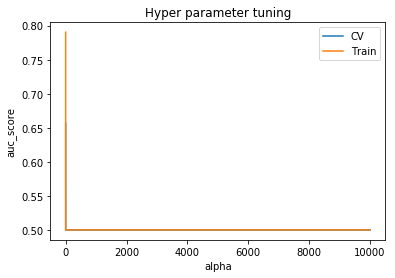

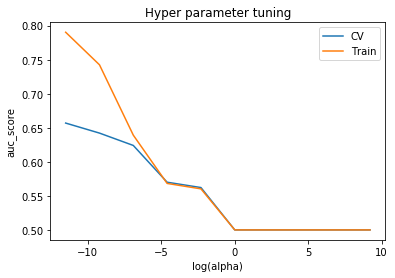

In [64]:
#https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values/37266356
import math

lists1 = sorted(roc_auc_score_cv_bow_dict_l1.items())
x1, y1 = zip(*lists1) # unpack a list of pairs into two tuples
lists2 = sorted(roc_auc_score_train_bow_dict_l1.items())
x2, y2 = zip(*lists2) # unpack a list of pairs into two tuples
plt.xlabel('alpha')
plt.ylabel('auc_score')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.show()

x1=[math.log(i) for i in list(x1)]
x2=[math.log(i) for i in list(x2)]
plt.xlabel('log(alpha)')
plt.ylabel('auc_score')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.show()

###  Find best alpha

In [65]:
#https://stackoverflow.com/questions/268272/getting-key-with-maximum-value-in-dictionary
def find_highest_alpha(k_dict):
    k=max(k_dict, key=k_dict.get)
    return k 


In [66]:
print(find_highest_alpha(roc_auc_score_cv_bow_dict_l1))

1e-05


#### Train the model on the optimal alpha value and run the Test Dataset

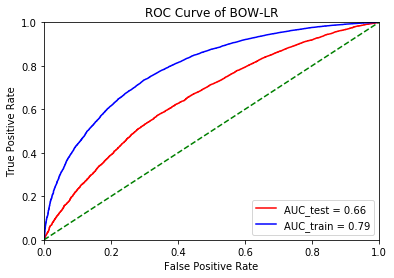

In [67]:

# train model on the best alpha
sgd = SGDClassifier(loss='hinge',penalty='l1',alpha=find_highest_alpha(roc_auc_score_cv_bow_dict_l1),random_state=3)

# fitting the model on crossvalidation train
sgd.fit(X_train_bow, y_train)

# fit the model to the calibrator
calibrated = CalibratedClassifierCV(base_estimator=sgd,method='sigmoid',cv='prefit')

calibrated.fit(X_train_bow,y_train)

# predict the response on the crossvalidation train
pred_bow_test = calibrated.predict(X_test_bow)
pred_bow_train = calibrated.predict(X_train_bow)

#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-scip_scores = knn.predict_proba(X_test)
pred_bow_test_scores=calibrated.predict_proba(X_test_bow)
pred_bow_train_scores=calibrated.predict_proba(X_train_bow)

fpr_test, tpr_test, threshold_test = roc_curve(y_test, pred_bow_test_scores[:, 1])
fpr_train, tpr_train, threshold_train = roc_curve(y_train, pred_bow_train_scores[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)
roc_auc_train = auc(fpr_train, tpr_train)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'r', label = 'AUC_test = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC_train = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of BOW-LR')
plt.show()

### Get the confusion matrix for the BOW_l1

Training CM for BOW


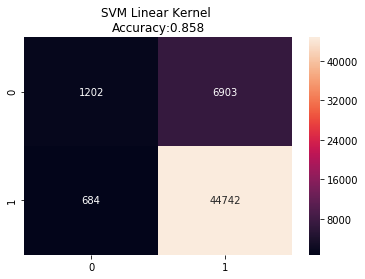

Testing CM for BOW


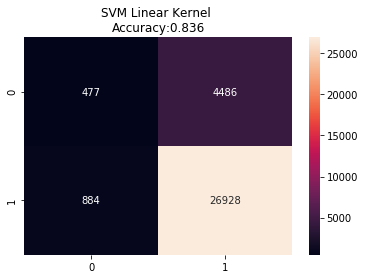

In [68]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
print("Training CM for BOW")
cm =confusion_matrix(y_train, pred_bow_train, labels=None, sample_weight=None)
sns.heatmap(cm, annot=True,fmt="d")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_train, pred_bow_train)))
plt.show()
print("="*50)
print("Testing CM for BOW")
cm =confusion_matrix(y_test, pred_bow_test, labels=None, sample_weight=None)
summary.append(['BoW_l1',find_highest_alpha(roc_auc_score_cv_bow_dict_l1),roc_auc_test])
sns.heatmap(cm, annot=True,fmt="d")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, pred_bow_test)))
plt.show()



###  Applying Logistic Regression on TFIDF L1 Regularization,<font color='red'> SET 2</font>

In [69]:
roc_auc_score_cv_tfidf_dict_l1={}
roc_auc_score_train_tfidf_dict_l1={}

alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in tqdm(alpha):
    # create instance of model
    sgd=SGDClassifier(loss='hinge',penalty='l1', alpha=i,random_state=3)
    
    # fitting the model on crossvalidation train
    sgd.fit(X_train_tfidf, y_train)

    # fit the model to the calibrator
    calibrated = CalibratedClassifierCV(base_estimator=sgd,method='sigmoid',cv='prefit')

    calibrated.fit(X_train_tfidf,y_train)

    # predict the response on the crossvalidation train
    pred_tfidf_cv = calibrated.predict_proba(X_cv_tfidf)
    
    
    #evaluate CV roc_auc
    roc_auc_cv =roc_auc_score(y_cv,pred_tfidf_cv[:,1])
    
    #insert into dict
    roc_auc_score_cv_tfidf_dict_l1[i]=roc_auc_cv
    
    
    # predict the response on the train
    pred_tfidf_train = calibrated.predict_proba(X_train_tfidf)
    
    #evaluate train roc_auc
    roc_auc_train =roc_auc_score(y_train,pred_tfidf_train[:,1])
    
    #insert into dict
    roc_auc_score_train_tfidf_dict_l1[i]=roc_auc_train
    
    
    
print(roc_auc_score_cv_tfidf_dict_l1)
print(roc_auc_score_train_tfidf_dict_l1)



100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [02:33<00:00, 14.23s/it]


{1e-05: 0.6900657223066203, 0.0001: 0.6879480286738351, 0.001: 0.5525508683544162, 0.01: 0.5622019820489264, 0.1: 0.5622019820489264, 1: 0.5, 10: 0.5, 100: 0.5, 1000: 0.5, 10000: 0.5}
{1e-05: 0.771684592384227, 0.0001: 0.7105485250289311, 0.001: 0.5588957634672798, 0.01: 0.5602924870007754, 0.1: 0.5602924870007754, 1: 0.5, 10: 0.5, 100: 0.5, 1000: 0.5, 10000: 0.5}


### Plot ROC_AUC_score VS different alpha values (Train and CV set)

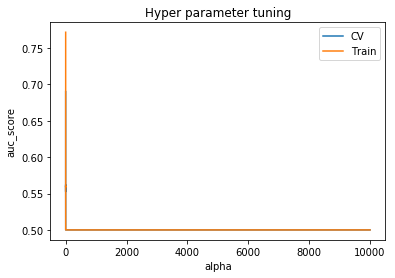

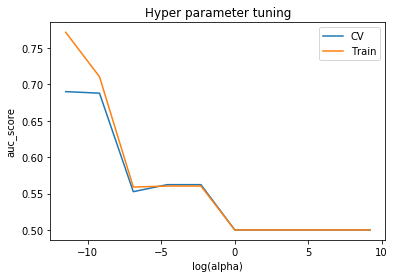

In [70]:
#https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values/37266356
import math

lists1 = sorted(roc_auc_score_cv_tfidf_dict_l1.items())
x1, y1 = zip(*lists1) # unpack a list of pairs into two tuples
lists2 = sorted(roc_auc_score_train_tfidf_dict_l1.items())
x2, y2 = zip(*lists2) # unpack a list of pairs into two tuples
plt.xlabel('alpha')
plt.ylabel('auc_score')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.show()

x1=[math.log(i) for i in list(x1)]
x2=[math.log(i) for i in list(x2)]
plt.xlabel('log(alpha)')
plt.ylabel('auc_score')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.show()


###  Find best alpha

In [71]:
print(find_highest_alpha(roc_auc_score_cv_tfidf_dict_l1))

1e-05


#### Train the model on the optimal alpha value and run the Test Dataset
 

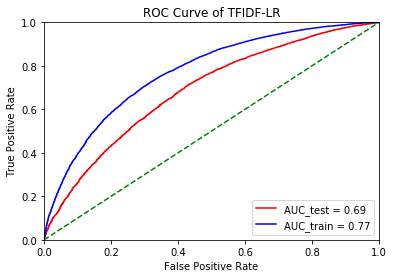

In [72]:
# train model on the best alpha
sgd = SGDClassifier(loss='hinge',penalty='l1',alpha=find_highest_alpha(roc_auc_score_cv_tfidf_dict_l1),random_state=3)

# fitting the model on crossvalidation train
sgd.fit(X_train_tfidf, y_train)

# fit the model to the calibrator
calibrated = CalibratedClassifierCV(base_estimator=sgd,method='sigmoid',cv='prefit')

calibrated.fit(X_train_tfidf,y_train)

# predict the response on the crossvalidation train
pred_tfidf_test = calibrated.predict(X_test_tfidf)
pred_tfidf_train = calibrated.predict(X_train_tfidf)

#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-scip_scores = knn.predict_proba(X_test)
pred_tfidf_test_scores=calibrated.predict_proba(X_test_tfidf)
pred_tfidf_train_scores=calibrated.predict_proba(X_train_tfidf)

fpr_test, tpr_test, threshold_test = roc_curve(y_test, pred_tfidf_test_scores[:, 1])
fpr_train, tpr_train, threshold_train = roc_curve(y_train, pred_tfidf_train_scores[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)
roc_auc_train = auc(fpr_train, tpr_train)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'r', label = 'AUC_test = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC_train = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of TFIDF-LR')
plt.show()


### Get the confusion matrix for the TFIDF_l1

Training CM for TFIDF


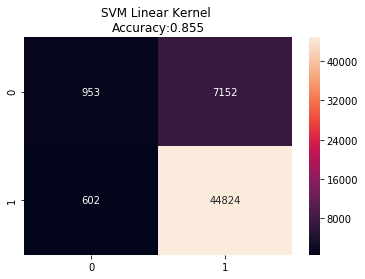

Testing CM for TFIDF


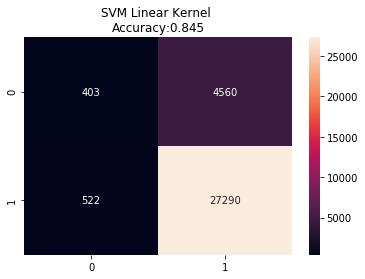

In [73]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
print("Training CM for TFIDF")
cm =confusion_matrix(y_train, pred_tfidf_train, labels=None, sample_weight=None)
sns.heatmap(cm, annot=True,fmt="d")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_train, pred_tfidf_train)))
plt.show()
print("="*50)
print("Testing CM for TFIDF")
cm =confusion_matrix(y_test, pred_tfidf_test, labels=None, sample_weight=None)

summary.append(['Tfidf_l1',find_highest_alpha(roc_auc_score_cv_tfidf_dict_l1),roc_auc_test])
sns.heatmap(cm, annot=True,fmt="d")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, pred_tfidf_test)))
plt.show()



###  Applying Logistic Regression on W2V L1 Regularization,<font color='red'> SET 3</font>

In [74]:
roc_auc_score_cv_w2v_dict_l1={}
roc_auc_score_train_w2v_dict_l1={}

alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in tqdm(alpha):
    # create instance of model
    sgd=SGDClassifier(loss='hinge',penalty='l1', alpha=i,random_state=1)
    
    # fitting the model on crossvalidation train
    sgd.fit(X_train_w2v, y_train)

    # fit the model to the calibrator
    calibrated = CalibratedClassifierCV(base_estimator=sgd,method='sigmoid',cv='prefit')

    calibrated.fit(X_train_w2v,y_train)

    # predict the response on the crossvalidation train
    pred_w2v_cv = calibrated.predict_proba(X_cv_w2v)
    
    
    #evaluate CV roc_auc
    roc_auc_cv =roc_auc_score(y_cv,pred_w2v_cv[:,1])
    
    #insert into dict
    roc_auc_score_cv_w2v_dict_l1[i]=roc_auc_cv
    
    
    # predict the response on the train
    pred_w2v_train = calibrated.predict_proba(X_train_w2v)
    
    #evaluate train roc_auc
    roc_auc_train =roc_auc_score(y_train,pred_w2v_train[:,1])
    
    #insert into dict
    roc_auc_score_train_w2v_dict_l1[i]=roc_auc_train
    
    
    
print(roc_auc_score_cv_w2v_dict_l1)
print(roc_auc_score_train_w2v_dict_l1)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:21<00:00,  2.10s/it]


{1e-05: 0.6058868699579216, 0.0001: 0.6860150705366077, 0.001: 0.6260504964585315, 0.01: 0.589322968509858, 0.1: 0.5, 1: 0.5, 10: 0.5, 100: 0.5, 1000: 0.5, 10000: 0.5}
{1e-05: 0.6187004738173598, 0.0001: 0.699848157573246, 0.001: 0.634499308255282, 0.01: 0.5880030630858635, 0.1: 0.5, 1: 0.5, 10: 0.5, 100: 0.5, 1000: 0.5, 10000: 0.5}


### Plot ROC_AUC_score VS different alpha values (Train and CV set)

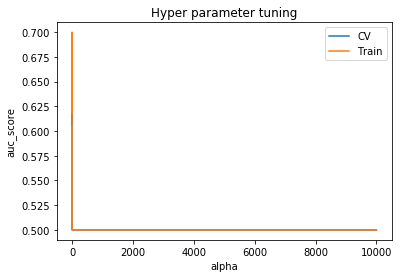

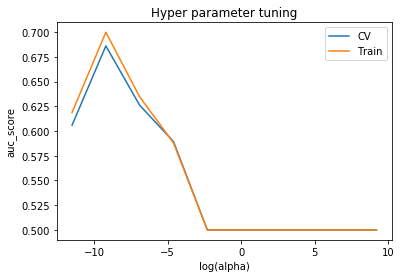

In [75]:
#https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values/37266356
import math

lists1 = sorted(roc_auc_score_cv_w2v_dict_l1.items())
x1, y1 = zip(*lists1) # unpack a list of pairs into two tuples
lists2 = sorted(roc_auc_score_train_w2v_dict_l1.items())
x2, y2 = zip(*lists2) # unpack a list of pairs into two tuples
plt.xlabel('alpha')
plt.ylabel('auc_score')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.show()

x1=[math.log(i) for i in list(x1)]
x2=[math.log(i) for i in list(x2)]
plt.xlabel('log(alpha)')
plt.ylabel('auc_score')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.show()


###  Find best alpha

In [76]:
print(find_highest_alpha(roc_auc_score_cv_w2v_dict_l1))

0.0001


#### Train the model on the optimal alpha value and run the Test Dataset


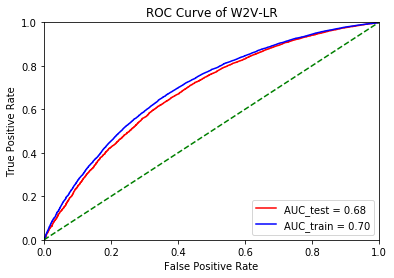

In [77]:
# train model on the best alpha
sgd = SGDClassifier(loss='hinge',penalty='l1',alpha=find_highest_alpha(roc_auc_score_cv_w2v_dict_l1),random_state=1)

# fitting the model on crossvalidation train
sgd.fit(X_train_w2v, y_train)

# fit the model to the calibrator
calibrated = CalibratedClassifierCV(base_estimator=sgd,method='sigmoid',cv='prefit')

calibrated.fit(X_train_w2v,y_train)

# predict the response on the crossvalidation train
pred_w2v_test = calibrated.predict(X_test_w2v)
pred_w2v_train = calibrated.predict(X_train_w2v)

#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-scip_scores = knn.predict_proba(X_test)
pred_w2v_test_scores=calibrated.predict_proba(X_test_w2v)
pred_w2v_train_scores=calibrated.predict_proba(X_train_w2v)

fpr_test, tpr_test, threshold_test = roc_curve(y_test, pred_w2v_test_scores[:, 1])
fpr_train, tpr_train, threshold_train = roc_curve(y_train, pred_w2v_train_scores[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)
roc_auc_train = auc(fpr_train, tpr_train)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'r', label = 'AUC_test = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC_train = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of W2V-LR')
plt.show()


### Get the confusion matrix for the W2V_l1

Training CM for W2V


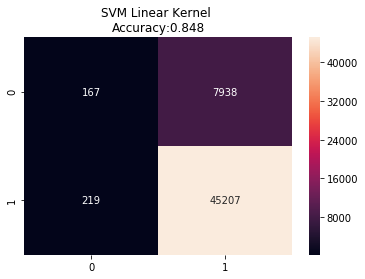

Testing CM for W2V


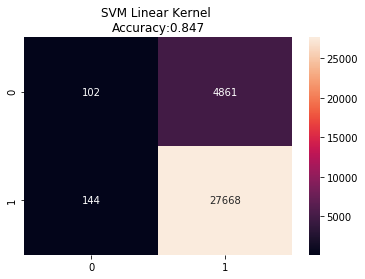

In [78]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
print("Training CM for W2V")
cm =confusion_matrix(y_train, pred_w2v_train, labels=None, sample_weight=None)
sns.heatmap(cm, annot=True,fmt="d")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_train, pred_w2v_train)))
plt.show()
print("="*50)	
print("Testing CM for W2V")
cm =confusion_matrix(y_test, pred_w2v_test, labels=None, sample_weight=None)
summary.append(['W2v_l1',find_highest_alpha(roc_auc_score_cv_w2v_dict_l1),roc_auc_test])
sns.heatmap(cm, annot=True,fmt="d")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, pred_w2v_test)))
plt.show()



###  Applying Logistic Regression on TFIDF_W2V L1 Regularization,<font color='red'> SET 4</font>

In [79]:

roc_auc_score_cv_tfidf_w2v_dict_l1={}
roc_auc_score_train_tfidf_w2v_dict_l1={}

alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in tqdm(alpha):
    # create instance of model
    sgd=SGDClassifier(loss='hinge',penalty='l1', alpha=i,random_state=1)
    
    # fitting the model on crossvalidation train
    sgd.fit(X_train_tfidf_w2v, y_train)

    # fit the model to the calibrator
    calibrated = CalibratedClassifierCV(base_estimator=sgd,method='sigmoid',cv='prefit')

    calibrated.fit(X_train_tfidf_w2v,y_train)

    # predict the response on the crossvalidation train
    pred_tfidf_w2v_cv = calibrated.predict_proba(X_cv_tfidf_w2v)
    
    
    #evaluate CV roc_auc
    roc_auc_cv =roc_auc_score(y_cv,pred_tfidf_w2v_cv[:,1])
    
    #insert into dict
    roc_auc_score_cv_tfidf_w2v_dict_l1[i]=roc_auc_cv
    
    
    # predict the response on the train
    pred_tfidf_w2v_train = calibrated.predict_proba(X_train_tfidf_w2v)
    
    #evaluate train roc_auc
    roc_auc_train =roc_auc_score(y_train,pred_tfidf_w2v_train[:,1])
    
    #insert into dict
    roc_auc_score_train_tfidf_w2v_dict_l1[i]=roc_auc_train
    
    
    
print(roc_auc_score_cv_tfidf_w2v_dict_l1)
print(roc_auc_score_train_tfidf_w2v_dict_l1)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:19<00:00,  2.01s/it]


{1e-05: 0.67583728916289, 0.0001: 0.6809009402554702, 0.001: 0.6531757116974148, 0.01: 0.5893229389379842, 0.1: 0.5, 1: 0.5, 10: 0.5, 100: 0.5, 1000: 0.5, 10000: 0.5}
{1e-05: 0.7053780955192483, 0.0001: 0.6977747377604833, 0.001: 0.6563414902905724, 0.01: 0.5880030644439032, 0.1: 0.5, 1: 0.5, 10: 0.5, 100: 0.5, 1000: 0.5, 10000: 0.5}


### Plot ROC_AUC_score VS different alpha values (Train and CV set)

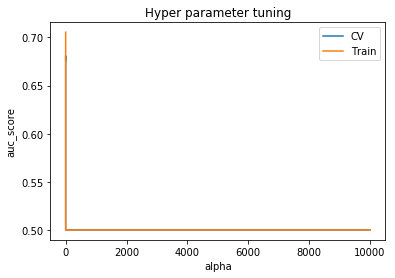

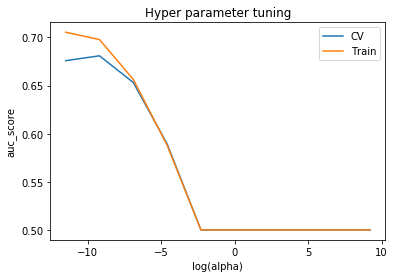

In [80]:
#https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values/37266356
import math

lists1 = sorted(roc_auc_score_cv_tfidf_w2v_dict_l1.items())
x1, y1 = zip(*lists1) # unpack a list of pairs into two tuples
lists2 = sorted(roc_auc_score_train_tfidf_w2v_dict_l1.items())
x2, y2 = zip(*lists2) # unpack a list of pairs into two tuples
plt.xlabel('alpha')
plt.ylabel('auc_score')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.show()

x1=[math.log(i) for i in list(x1)]
x2=[math.log(i) for i in list(x2)]
plt.xlabel('log(alpha)')
plt.ylabel('auc_score')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.show()


###  Find best alpha

In [81]:
print(find_highest_alpha(roc_auc_score_cv_tfidf_w2v_dict_l1))

0.0001


#### Train the model on the optimal alpha value and run the Test Dataset


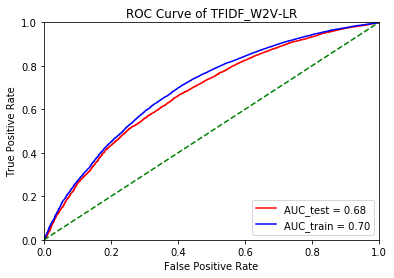

In [82]:
# train model on the best alpha
sgd = SGDClassifier(loss='hinge',penalty='l1',alpha=find_highest_alpha(roc_auc_score_cv_tfidf_w2v_dict_l1),random_state=1)

# fitting the model on crossvalidation train
sgd.fit(X_train_tfidf_w2v, y_train)

# fit the model to the calibrator
calibrated = CalibratedClassifierCV(base_estimator=sgd,method='sigmoid',cv='prefit')

calibrated.fit(X_train_tfidf_w2v,y_train)

# predict the response on the crossvalidation train
pred_tfidf_w2v_test = calibrated.predict(X_test_tfidf_w2v)
pred_tfidf_w2v_train = calibrated.predict(X_train_tfidf_w2v)

#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-scip_scores = knn.predict_proba(X_test)
pred_tfidf_w2v_test_scores=calibrated.predict_proba(X_test_tfidf_w2v)
pred_tfidf_w2v_train_scores=calibrated.predict_proba(X_train_tfidf_w2v)

fpr_test, tpr_test, threshold_test = roc_curve(y_test, pred_tfidf_w2v_test_scores[:, 1])
fpr_train, tpr_train, threshold_train = roc_curve(y_train, pred_tfidf_w2v_train_scores[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)
roc_auc_train = auc(fpr_train, tpr_train)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'r', label = 'AUC_test = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC_train = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of TFIDF_W2V-LR')
plt.show()


### Get the confusion matrix for the TFIDF_W2V_l1

Training CM for TFIDF_W2V


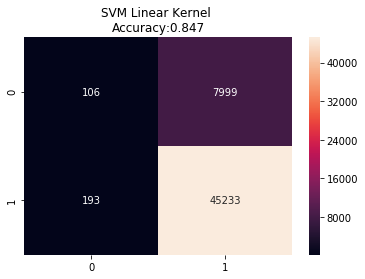

Testing CM for TFIDF_W2V


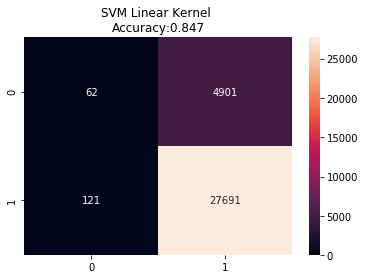

In [83]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
print("Training CM for TFIDF_W2V")
cm =confusion_matrix(y_train, pred_tfidf_w2v_train, labels=None, sample_weight=None)
sns.heatmap(cm, annot=True,fmt="d")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_train, pred_tfidf_w2v_train)))
plt.show()
print("="*50)	
print("Testing CM for TFIDF_W2V")
cm =confusion_matrix(y_test, pred_tfidf_w2v_test, labels=None, sample_weight=None)
summary.append(['Tfidf_w2v_l1',find_highest_alpha(roc_auc_score_cv_tfidf_w2v_dict_l1),roc_auc_test])
sns.heatmap(cm, annot=True,fmt="d")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, pred_tfidf_w2v_test)))
plt.show()



### Lets Prepare SET 5

### Lets apply TruncatedSVD 

<li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10, max_features=5000)
vectorizer.fit(X_train['essay'])

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf=vectorizer.transform(X_train['essay'].values)
X_test_essay_tfidf=vectorizer.transform(X_test['essay'].values)
X_cv_essay_tfidf=vectorizer.transform(X_cv['essay'].values)


print("Shape of matrix after one hot encodig ",X_train_essay_tfidf.shape)

Shape of matrix after one hot encodig  (53531, 5000)


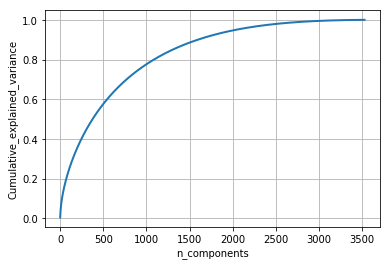

In [85]:
# initializing the pca
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD()

svd.n_components =int(X_train_essay_tfidf.shape[1]-1)
#choosing only 50000 Data points to avoid memory error. 
svd_data = svd.fit_transform(X_train_essay_tfidf[50000:])

percentage_var_explained = svd.explained_variance_ / np.sum(svd.explained_variance_)

cum_var_explained = np.cumsum(percentage_var_explained)

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

### 1750 Features have a Cumulative explained variance of 90% + 

In [86]:
svd = TruncatedSVD(n_components= 1750)
svd.fit(X_train_essay_tfidf)

X_train_svd=svd.transform(X_train_essay_tfidf)
X_test_svd=svd.transform(X_test_essay_tfidf)
X_cv_svd=svd.transform(X_cv_essay_tfidf)

In [87]:
print(X_train_svd.shape)
print(X_test_svd.shape)
print(X_cv_svd.shape)


(53531, 1750)
(32775, 1750)
(22942, 1750)


In [88]:
X_train_essay_sentiment_score=X_train['essay_sentiment_score'][:,np.newaxis]
X_test_essay_sentiment_score=X_test['essay_sentiment_score'][:,np.newaxis]
X_cv_essay_sentiment_score=X_cv['essay_sentiment_score'][:,np.newaxis]

In [89]:
X_train_svd = hstack((X_train_clean_categories, X_train_clean_sub_categories,X_train_skl_state,X_train_teacher_prefix,
            X_train_project_grade_category,X_train_price_standardized,X_train_quantity_standardized,X_train_prev_proj,
            X_train_essay_sentiment_score,X_train_svd,X_train_essay_count_standardized,X_train_title_count_standardized
            )).tocsr()


X_test_svd = hstack((X_test_clean_categories, X_test_clean_sub_categories,X_test_skl_state,X_test_teacher_prefix,
            X_test_project_grade_category,X_test_price_standardized,X_test_quantity_standardized,X_test_prev_proj,
            X_test_essay_sentiment_score,X_test_svd,X_test_essay_count_standardized,X_test_title_count_standardized
            )).tocsr()


X_cv_svd = hstack((X_cv_clean_categories, X_cv_clean_sub_categories,X_cv_skl_state,X_cv_teacher_prefix,
            X_cv_project_grade_category,X_cv_price_standardized,X_cv_quantity_standardized,X_cv_prev_proj,
            X_cv_essay_sentiment_score,X_cv_svd,X_cv_essay_count_standardized,X_cv_title_count_standardized
            )).tocsr()


print(X_train_svd.shape)
print(X_test_svd.shape)
print(X_cv_svd.shape)

(53531, 1854)
(32775, 1854)
(22942, 1854)


###  Applying Logistic Regression on SVD L1 Regularization,<font color='red'> SET 5</font>

In [90]:

#store the results 
roc_auc_score_cv_svd_dict_l1={}
roc_auc_score_train_svd_dict_l1={}

alpha=[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
for i in tqdm(alpha):
    # create instance of model
    sgd=SGDClassifier(loss='hinge',penalty='l1', alpha=i,random_state=3)
    
    # fitting the model on crossvalidation train
    sgd.fit(X_train_svd, y_train)

    # fit the model to the calibrator
    calibrated = CalibratedClassifierCV(base_estimator=sgd,method='sigmoid',cv='prefit')

    calibrated.fit(X_train_svd,y_train)

    # predict the response on the crossvalidation train
    pred_svd_cv = calibrated.predict_proba(X_cv_svd)
    
    
    #evaluate CV roc_auc
    roc_auc_cv =roc_auc_score(y_cv,pred_svd_cv[:,1])
    
    #insert into dict
    roc_auc_score_cv_svd_dict_l1[i]=roc_auc_cv
    
    
    # predict the response on the train
    pred_svd_train = calibrated.predict_proba(X_train_svd)
    
    #evaluate train roc_auc
    roc_auc_train =roc_auc_score(y_train,pred_svd_train[:,1])
    
    #insert into dict
    roc_auc_score_train_svd_dict_l1[i]=roc_auc_train
    
    
    
print(roc_auc_score_cv_svd_dict_l1)
print(roc_auc_score_train_svd_dict_l1)


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:50<00:00,  5.62s/it]


{1e-05: 0.6976315161771752, 0.0001: 0.682706731942438, 0.001: 0.5927230390565199, 0.01: 0.567274600812233, 0.1: 0.5622019820489264, 1: 0.5622019820489264, 10: 0.5, 100: 0.5, 1000: 0.5, 10000: 0.5}
{1e-05: 0.740433277971484, 0.0001: 0.7037569912226902, 0.001: 0.5973878471682684, 0.01: 0.56563827746996, 0.1: 0.5602924870007754, 1: 0.5602924870007754, 10: 0.5, 100: 0.5, 1000: 0.5, 10000: 0.5}


### Plot ROC_AUC_score VS different alpha values (Train and CV set)

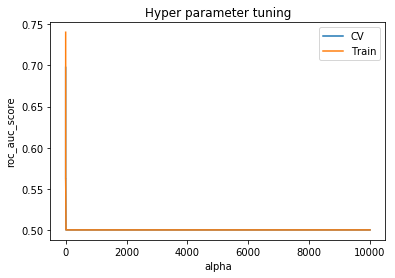

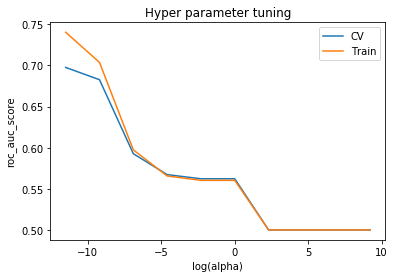

In [91]:
#https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values/37266356
import math

lists1 = sorted(roc_auc_score_cv_svd_dict_l1.items())
x1, y1 = zip(*lists1) # unpack a list of pairs into two tuples
lists2 = sorted(roc_auc_score_train_svd_dict_l1.items())
x2, y2 = zip(*lists2) # unpack a list of pairs into two tuples
plt.xlabel('alpha')
plt.ylabel('roc_auc_score')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.show()

x1=[math.log(i) for i in list(x1)]
x2=[math.log(i) for i in list(x2)]
plt.xlabel('log(alpha)')
plt.ylabel('roc_auc_score')
plt.title('Hyper parameter tuning')
plt.plot(x1, y1,label="CV")
plt.plot(x2, y2,label='Train')
plt.legend()
plt.show()


###  Find best alpha

In [92]:
print(find_highest_alpha(roc_auc_score_cv_svd_dict_l1))

1e-05


#### Train the model on the optimal alpha value and run the Test Dataset


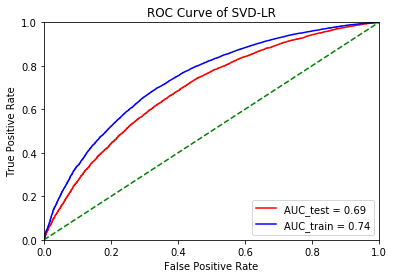

In [93]:
# train model on the best alpha
sgd = SGDClassifier(loss='hinge',penalty='l1',alpha=find_highest_alpha(roc_auc_score_cv_svd_dict_l1),random_state=3)

# fitting the model on crossvalidation train
sgd.fit(X_train_svd, y_train)

# predict the response on the crossvalidation train
pred_svd_test = sgd.predict(X_test_svd)
pred_svd_train = sgd.predict(X_train_svd)

#https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-scip_scores = knn.predict_proba(X_test)
pred_svd_test_scores=sgd.decision_function(X_test_svd)
pred_svd_train_scores=sgd.decision_function(X_train_svd)

fpr_test, tpr_test, threshold_test = roc_curve(y_test, pred_svd_test_scores)
fpr_train, tpr_train, threshold_train = roc_curve(y_train, pred_svd_train_scores)
roc_auc_test = auc(fpr_test, tpr_test)
roc_auc_train = auc(fpr_train, tpr_train)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_test, tpr_test, 'r', label = 'AUC_test = %0.2f' % roc_auc_test)
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC_train = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of SVD-LR')
plt.show()




### Get the confusion matrix for the SVD_l1

Training CM for SVD


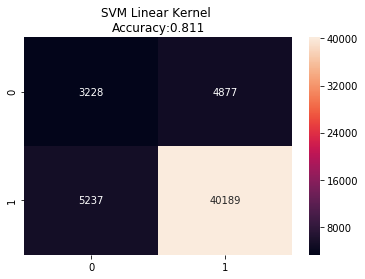

Testing CM for SVD


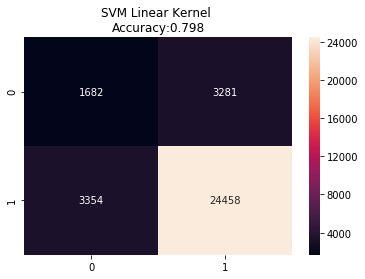

In [94]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn.metrics import confusion_matrix
print("Training CM for SVD")
cm =confusion_matrix(y_train, pred_svd_train, labels=None, sample_weight=None)
sns.heatmap(cm, annot=True,fmt="d")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_train, pred_svd_train)))
plt.show()
print("="*50)	
print("Testing CM for SVD")
cm =confusion_matrix(y_test, pred_svd_test, labels=None, sample_weight=None)
summary.append(['Svd_l1',find_highest_alpha(roc_auc_score_cv_svd_dict_l1),roc_auc_test])
sns.heatmap(cm, annot=True,fmt="d")
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, pred_svd_test)))
plt.show()



## Conclusions

In [95]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Vectorizer", "Hyper parameter", "AUC"]

for each in summary:
    x.add_row(each)

print(x)

+--------------+-----------------+--------------------+
|  Vectorizer  | Hyper parameter |        AUC         |
+--------------+-----------------+--------------------+
|    BoW_l1    |      1e-05      | 0.6566388520847455 |
|   Tfidf_l1   |      1e-05      | 0.6875044319768386 |
|    W2v_l1    |      0.0001     | 0.6834062570717832 |
| Tfidf_w2v_l1 |      0.0001     | 0.679106544042193  |
|    Svd_l1    |      1e-05      | 0.6942992700854728 |
+--------------+-----------------+--------------------+
